In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [8]:
# Problem parameters
# (Double-check with Ragusa on appropriate parameters)
sigma_s = 0 # Macroscopic cross section for scattering [cm^(-1)] {Play with sigma_s = ln(2) or something}
sigma_t = 1 # Macroscopic total interaction cross section [cm^(-1)] (reciprocal is neutron mfp)
q_ext = 3 
q = q_ext/2.0
# Vacuum boundary conditions
psi_left = 1.5
psi_right = 1.5

# Number of points in domain
npts = 101
# Left- and right-endpoints of domain
a = 0
b = 10
points = np.linspace(a, b, npts)
dx     = np.abs(points[1] - points[0])

# Quadrature order (needs to be odd to avoid mu = 0)
n = 16
mu_s, weights = scipy.special.roots_legendre(n)
# By default, mu_s entries go from negative to positive, and we want the opposite
mu_s = np.flip(mu_s)

# Array to store angular flux values (each row corresponds to a different angle,
# and there as many columns as there are points)
psi_vals = np.zeros((mu_s.size, npts))
# Impose BCs
psi_vals[0:int((n/2)), 0]  = psi_left # Impose left BC for forward sweep
psi_vals[int((n/2)):, -1] = psi_right # Impose right BC for reverse sweep

for mu_idx, mu_d in enumerate(mu_s):
    # If angle is greater than 0, perform a forward sweep (left -> right)
    if mu_d > 0:
        # Loop through points (cell boundaries)
        for pt_idx in np.arange(npts-1):
            # print(f"Forward sweep: {cell_idx}")
            # Point to the right of current point
            if pt_idx < (npts - 1):
                pt_r_idx = pt_idx + 1 
                psi_vals[mu_idx, pt_r_idx] = (q*dx + mu_d*psi_vals[mu_idx, pt_idx] - (sigma_t/2.0)*psi_vals[mu_idx, pt_idx]*dx) / \
                                            (mu_d + ((sigma_t * dx)/2.0))
    # If angle is less than 0, perform a reverse sweep (right -> left)            
    else:
        for pt_idx in np.arange(npts-1, -1, -1):
                # Reverse sweep 
                if pt_idx > 0:
                    pt_l_idx = pt_idx - 1
                    psi_vals[mu_idx, pt_l_idx] = (q*dx - mu_d*psi_vals[mu_idx, pt_idx] - (sigma_t/2.0)*psi_vals[mu_idx, pt_idx]*dx) / \
                                                (-mu_d + ((sigma_t * dx)/2.0))

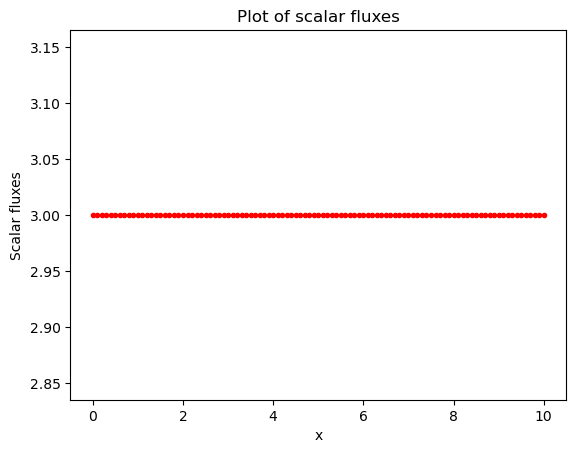

In [9]:
# Compute average flux (average of each consecutive 2 angular flux values for each angle)
average_flux = psi_vals[:, 0:(npts-1)] + psi_vals[:, 1:npts]/2.0
# print(average_flux[0, :])
# print(psi_vals[0:int(n/2), :])
# print(psi_vals[int(n/2):, :])
scalar_fluxes = np.sum(weights.reshape((n, 1)) * psi_vals, axis=0)
# print(scalar_fluxes.shape)
# print(scalar_fluxes)

plt.figure()
plt.plot(points, scalar_fluxes, 'r.')
plt.xlabel("x")
plt.ylabel("Scalar fluxes")
plt.title("Plot of scalar fluxes")
plt.show()

(16, 1)
